In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('laptop_price_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


In [42]:
df.shape

(1302, 13)

In [43]:
df.isnull().sum()

Unnamed: 0     0
Company        0
TypeName       0
Ram            0
Weight         0
Price          0
Touchscreen    0
Ips            0
Cpu brand      0
HDD            0
SSD            0
Gpu brand      0
os             0
dtype: int64

In [44]:
df.duplicated().sum()

0

In [45]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [46]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


In [47]:
df.dtypes

Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
Touchscreen      int64
Ips              int64
Cpu brand       object
HDD              int64
SSD              int64
Gpu brand       object
os              object
dtype: object

In [48]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os'], dtype='object')
Index(['Ram', 'Weight', 'Price', 'Touchscreen', 'Ips', 'HDD', 'SSD'], dtype='object')


In [49]:
for i in cat_cols:
    print(f'Feature {i} | Unique Count  {df[i].nunique()}')

Feature Company | Unique Count  19
Feature TypeName | Unique Count  6
Feature Cpu brand | Unique Count  5
Feature Gpu brand | Unique Count  3
Feature os | Unique Count  3


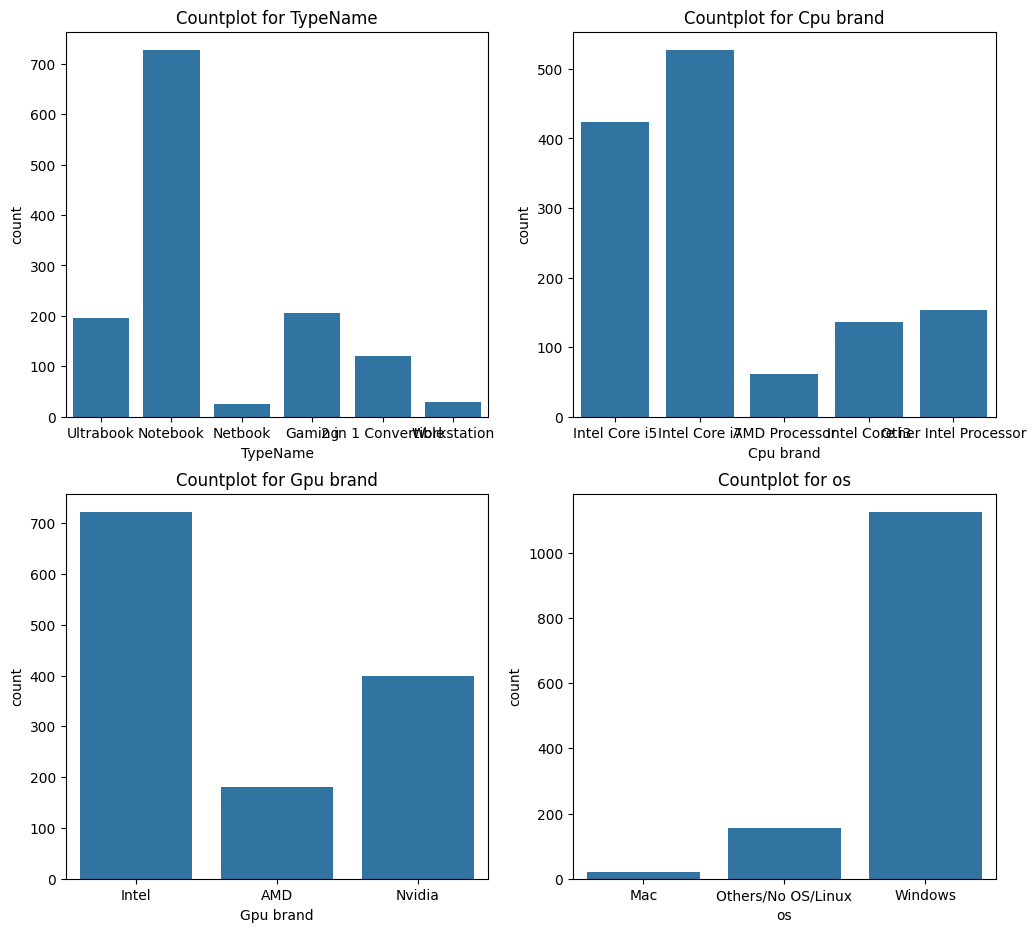

In [50]:
cols = ['TypeName', 'Cpu brand', 'Gpu brand', 'os']
plt.figure(figsize=(12,11))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')
plt.show()

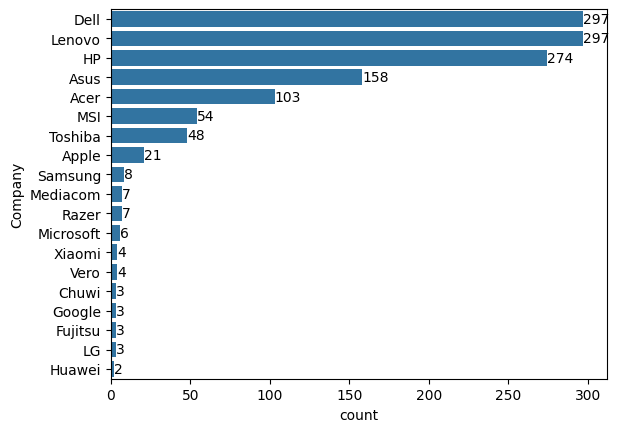

In [51]:
ax = sns.countplot(y = df['Company'],
              order=df['Company'].value_counts().sort_values(ascending=False).index)
ax.bar_label(ax.containers[0])
plt.show()

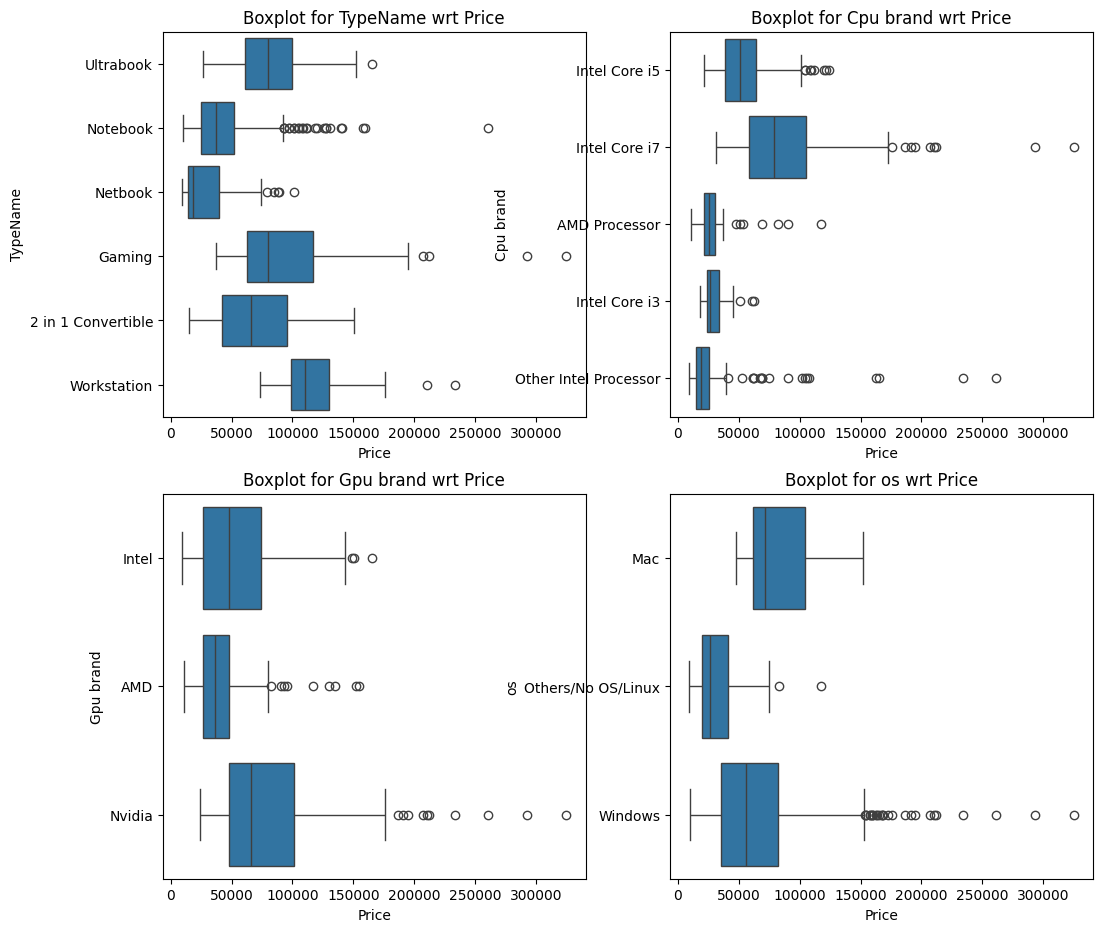

In [52]:
cols = ['TypeName', 'Cpu brand', 'Gpu brand', 'os']
plt.figure(figsize=(12,11))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x =df['Price'], y=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]} wrt Price')
plt.show()

In [53]:
for i in num_cols:
    print(f'Feature {i} | Unique Count  {df[i].nunique()}')

Feature Ram | Unique Count  9
Feature Weight | Unique Count  171
Feature Price | Unique Count  791
Feature Touchscreen | Unique Count  2
Feature Ips | Unique Count  2
Feature HDD | Unique Count  6
Feature SSD | Unique Count  13


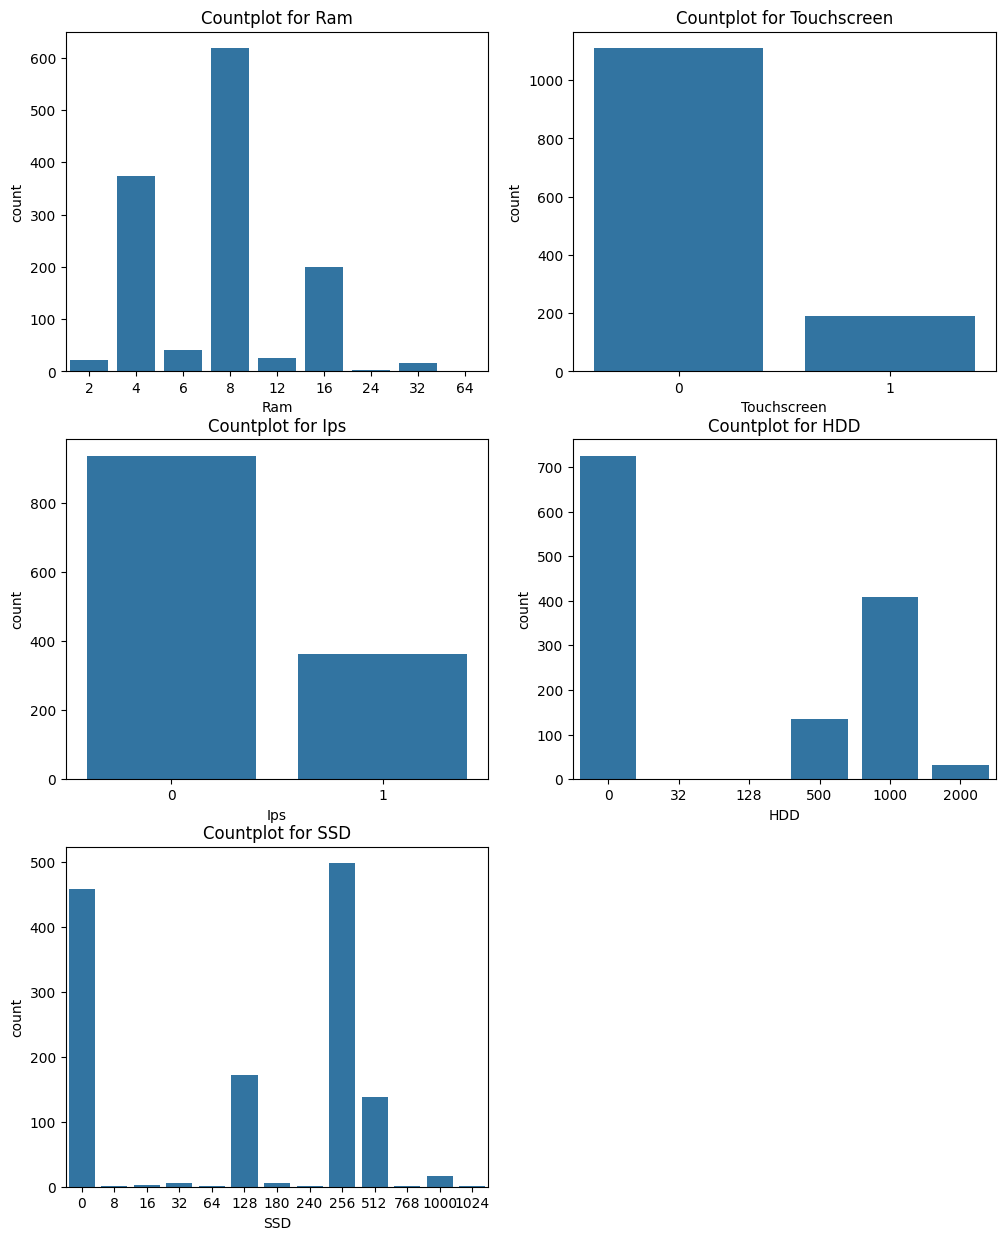

In [54]:
cols = ['Ram','Touchscreen','Ips','HDD','SSD']
plt.figure(figsize=(12,15))
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')
plt.show()

In [55]:
corr = df[num_cols].corr()
corr

,Ram,Weight,Price,Touchscreen,Ips,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.095808,0.603379
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,0.514147,-0.063818
Price,0.742905,0.209867,1.000000,0.192917,0.253320,-0.096891,0.670660
Touchscreen,0.118875,-0.293004,0.192917,1.000000,0.148026,-0.208766,0.257577
Ips,0.207949,0.018643,0.253320,0.148026,1.000000,-0.093588,0.225311
HDD,0.095808,0.514147,-0.096891,-0.208766,-0.093588,1.000000,-0.400750
SSD,0.603379,-0.063818,0.670660,0.257577,0.225311,-0.400750,1.000000


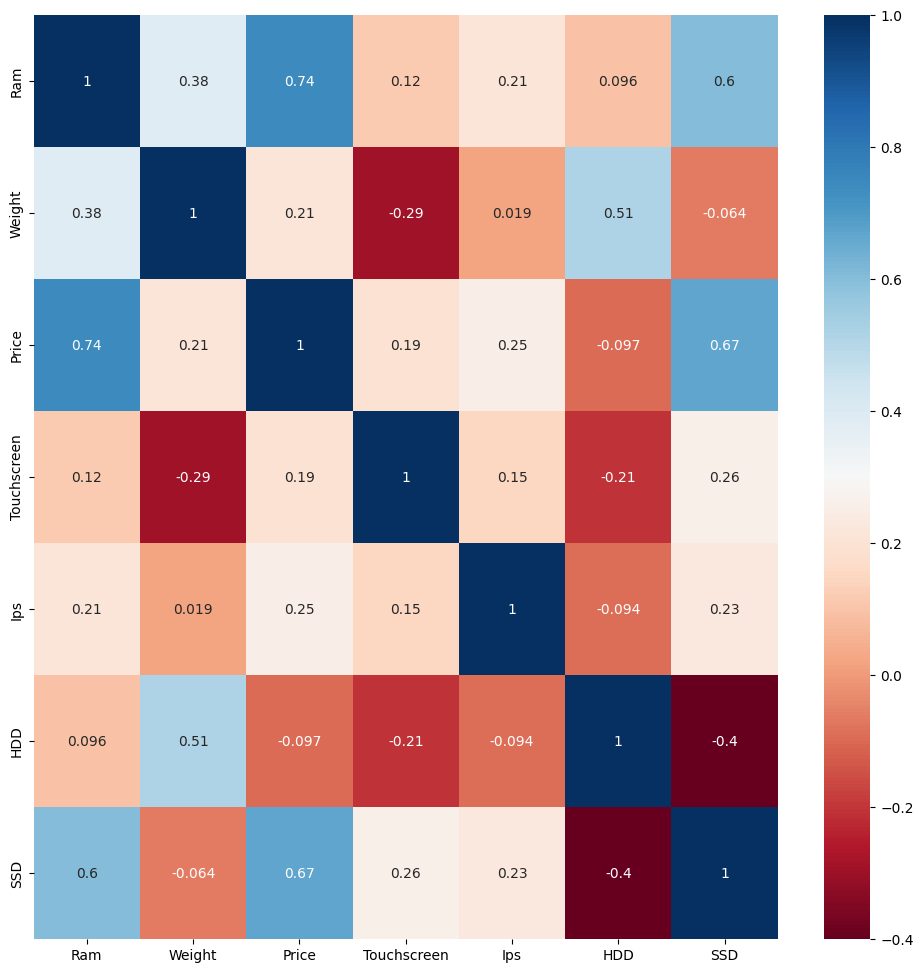

In [56]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

In [57]:
len(num_cols)

7

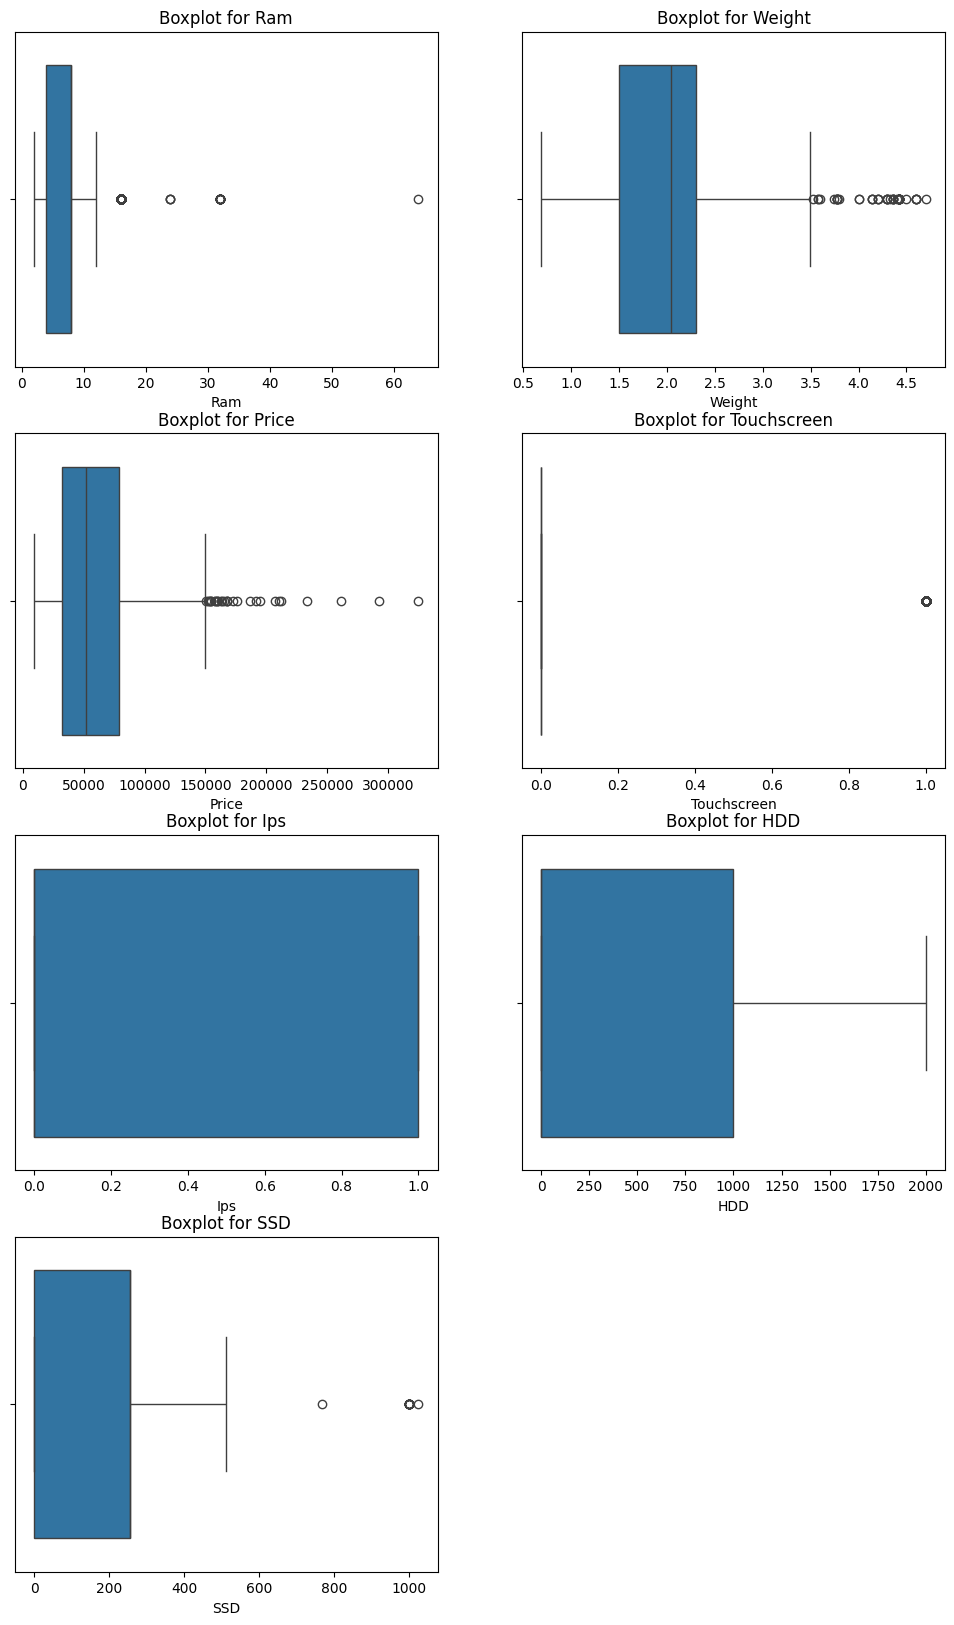

In [58]:
plt.figure(figsize=(12,20))
for i in range(len(num_cols)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x =df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')
plt.show()

In [59]:
a = df[['Weight','Price']].describe(percentiles = [0.01,0.02,0.05,0.95,0.98,0.99]).T

a = a.iloc[:,3:]
a

,min,1%,2%,5%,50%,95%,98%,99%,max
Weight,0.69,0.97,1.0802,1.17,2.04,3.200,4.298000,4.420000,4.70
Price,9270.72,12201.12,13747.3056,16463.52,52107.84,130472.064,152848.076256,167777.851536,324954.72


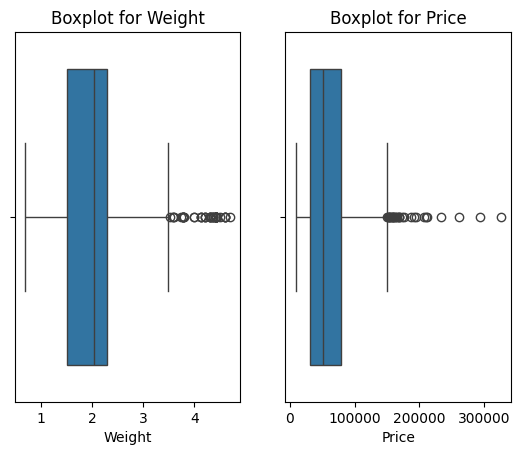

In [60]:
cols = ['Weight','Price']
for i in range(len(cols)):
    plt.subplot(1,2,i+1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')
plt.show()

In [61]:
df['Price'] = np.where(df['Price']>167777.851536,167777.851536,df['Price'])
df['Weight'] = np.where(df['Weight']>4.4200,4.4200,df['Weight'])

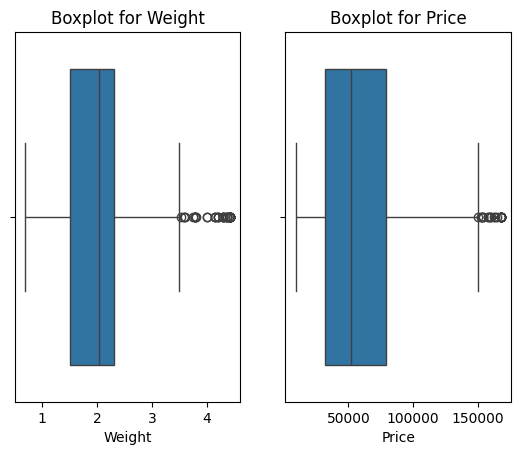

In [62]:
cols = ['Weight','Price']
for i in range(len(cols)):
    plt.subplot(1,2,i+1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')
plt.show()

In [63]:
df.dtypes

Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
Touchscreen      int64
Ips              int64
Cpu brand       object
HDD              int64
SSD              int64
Gpu brand       object
os              object
dtype: object

In [64]:
for i in cat_cols:
    print(i,df[i].nunique())

Company 19
TypeName 6
Cpu brand 5
Gpu brand 3
os 3


In [65]:
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [66]:
df1 = df.copy()

In [67]:
df['Company'] = df['Company'].replace(['LG','Huawei','Google','Chuwi',
                                       'Fujitsu','Vero','Xiaomi',
                                      'Microsoft','Mediacom','Razer',
                                      'Samsung'],'Others')

In [68]:
df['Company'].value_counts()

Company
Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Others      50
Toshiba     48
Apple       21
Name: count, dtype: int64

In [69]:
for i in cat_cols:
    print(i,df[i].nunique())

Company 9
TypeName 6
Cpu brand 5
Gpu brand 3
os 3


In [70]:
df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: count, dtype: int64

In [71]:
df['Cpu brand'].value_counts()

Cpu brand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             62
Name: count, dtype: int64

In [72]:
df['Cpu brand'].value_counts()

Cpu brand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             62
Name: count, dtype: int64

In [73]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [74]:
df['os'].value_counts()

os
Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: count, dtype: int64

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
lb = LabelEncoder()

In [78]:
for i in cat_cols:
    df[i] = lb.fit_transform(df[i])

In [79]:
df.dtypes

Company          int32
TypeName         int32
Ram              int64
Weight         float64
Price          float64
Touchscreen      int64
Ips              int64
Cpu brand        int32
HDD              int64
SSD              int64
Gpu brand        int32
os               int32
dtype: object

In [81]:
x = df.drop('Price',axis=1)
y = df['Price']
print(x.shape)
print(y.shape)

(1302, 11)
(1302,)


In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(911, 11)
(391, 11)
(911,)
(391,)


In [84]:
x_train.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
1122,4,3,8,1.43,0,0,2,0,256,1,2
438,5,4,24,1.32,0,0,3,0,512,1,2
579,3,3,8,2.20,0,0,3,0,256,0,1
842,4,3,8,2.63,0,0,2,1000,0,2,2
1161,6,1,16,1.70,0,0,3,1000,256,2,2


In [85]:
from sklearn.metrics import *

In [86]:
def eval_model(model,x_train,y_train,x_test,y_test,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_r2 = model.score(x_train,y_train) 
    test_r2 = model.score(x_test,y_test)
    test_mae = mean_absolute_error(y_test,ypred)
    test_mse = mean_squared_error(y_test,ypred)
    test_rmse = np.sqrt(test_mse)
    data = {'Train_R2':train_r2,'Test_R2':test_r2,'Test_MAE':test_mae,
          'Test_MSE':test_mse,'Test_RMSE':test_rmse}
    res = pd.DataFrame(data,index=[mname])
    return res

In [87]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

#### 1) LinReg

In [88]:
lr1 = LinearRegression()
lr1_res = eval_model(lr1,x_train,y_train,x_test,y_test,'Lin_Reg')
lr1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Lin_Reg,0.658522,0.637247,16119.913256,4.607410e+08,21464.878896


#### 2) Ridge

In [89]:
rid1 = Ridge(alpha=7)
rid1_res = eval_model(rid1,x_train,y_train,x_test,y_test,'Ridge')
rid1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Ridge,0.658398,0.638295,16087.897105,4.594101e+08,21433.854214


#### 3) DT Reg

In [90]:
dt1 = DecisionTreeRegressor(max_depth=7,min_samples_split=15)
dt1_res = eval_model(dt1,x_train,y_train,x_test,y_test,'DT_Reg')
dt1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
DT_Reg,0.824535,0.730058,12511.489596,3.428593e+08,18516.459942


#### 4) RF Reg

In [91]:
rf1 = RandomForestRegressor(n_estimators=80,max_depth=7,min_samples_split=15,random_state=42)
# rf1 = RandomForestRegressor(n_estimators=100,max_depth=6,min_samples_split=8,random_state=42)
rf1_res = eval_model(rf1,x_train,y_train,x_test,y_test,'RF_Reg')
rf1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
RF_Reg,0.84278,0.786658,11378.618364,2.709711e+08,16461.200895


#### 5) Bagging Reg

In [93]:
bag1 = BaggingRegressor(n_estimators=50,max_features=x_train.shape[1],
                        max_samples=x_train.shape[0])
bag1_res = eval_model(bag1,x_train,y_train,x_test,y_test,'Bagging_Reg')
bag1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Bagging_Reg,0.964489,0.818628,10002.053584,2.303644e+08,15177.75889


#### 6) AdaBoost Reg

In [94]:
adab1 = AdaBoostRegressor(n_estimators=100)
adab1_res = eval_model(adab1,x_train,y_train,x_test,y_test,'AdaBoost_Reg')
adab1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
AdaBoost_Reg,0.705809,0.67923,16432.284066,4.074175e+08,20184.585868


#### 7) KNN Reg

In [95]:
knn1 = KNeighborsRegressor(n_neighbors=5)
knn1_res = eval_model(knn1,x_train,y_train,x_test,y_test,'KNN_Reg')
knn1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
KNN_Reg,0.815278,0.689434,13084.386985,3.944573e+08,19860.948017


In [96]:
all_res = pd.concat([lr1_res,rid1_res,knn1_res,dt1_res,
                     rf1_res,adab1_res,bag1_res])
all_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Lin_Reg,0.658522,0.637247,16119.913256,4.607410e+08,21464.878896
Ridge,0.658398,0.638295,16087.897105,4.594101e+08,21433.854214
KNN_Reg,0.815278,0.689434,13084.386985,3.944573e+08,19860.948017
DT_Reg,0.824535,0.730058,12511.489596,3.428593e+08,18516.459942
RF_Reg,0.842780,0.786658,11378.618364,2.709711e+08,16461.200895
AdaBoost_Reg,0.705809,0.679230,16432.284066,4.074175e+08,20184.585868
Bagging_Reg,0.964489,0.818628,10002.053584,2.303644e+08,15177.758890


In [98]:
import pickle

In [99]:
pickle.dump(bag1,open('bag1_15Jun.pkl','wb'))
pickle.dump(rf1,open('rf1_15Jun.pkl','wb'))
pickle.dump(lr1,open('lr1_15Jun.pkl','wb'))

In [100]:
x.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,1,4,8,1.37,0,1,2,0,128,1,0
1,1,4,8,1.34,0,0,2,0,0,1,0
2,4,3,8,1.86,0,0,2,0,256,1,1
3,1,4,16,1.83,0,1,3,0,512,0,0
4,1,4,8,1.37,0,1,2,0,256,1,0


In [102]:
df['Company'].unique()

array([1, 4, 0, 2, 3, 5, 7, 6, 8])

In [103]:
df['TypeName'].unique()

array([4, 3, 2, 1, 0, 5])

In [109]:
print(df['HDD'].unique())
print(df['SSD'].unique())
print(df['SSD'].nunique())

[   0  500 1000 2000   32  128]
[ 128    0  256  512   32   64 1000 1024   16  768  180  240    8]
13


In [106]:
df['Ram'].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64], dtype=int64)

In [107]:
df['Weight'].describe()

count    1302.000000
mean        2.038587
std         0.662172
min         0.690000
25%         1.500000
50%         2.040000
75%         2.300000
max         4.420000
Name: Weight, dtype: float64

In [110]:
x.shape

(1302, 11)

In [112]:
df['Company'].value_counts()
# Dell       297
# Lenovo     297
# HP         274
# Asus       158
# Acer       103
# MSI         54
# Others      50
# Toshiba     48
# Apple       21

Company
3    297
5    297
4    274
2    158
0    103
6     54
7     50
8     48
1     21
Name: count, dtype: int64

In [114]:
df['TypeName'].value_counts()
# Notebook              727
# Gaming                205
# Ultrabook             196
# 2 in 1 Convertible    120
# Workstation            29
# Netbook                25

TypeName
3    727
1    205
4    196
0    120
5     29
2     25
Name: count, dtype: int64

In [115]:
x.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [117]:
df['Cpu brand'].value_counts()
# Intel Core i7            527
# Intel Core i5            423
# Other Intel Processor    154
# Intel Core i3            136
# AMD Processor             62

Cpu brand
3    527
2    423
4    154
1    136
0     62
Name: count, dtype: int64

In [116]:
df['Gpu brand'].value_counts()
# Intel     722
# Nvidia    400
# AMD       180

Gpu brand
1    722
2    400
0    180
Name: count, dtype: int64

In [118]:
df['os'].value_counts()
# Windows               1125
# Others/No OS/Linux     156
# Mac                     21

os
2    1125
1     156
0      21
Name: count, dtype: int64